In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set style and load data
sns.set(style="whitegrid")
df = pd.read_csv("data/GHGs_by_Sector_and_State_new.csv", dtype=str)
df["FlowAmount"] = df["FlowAmount"].str.replace(",", "").astype(float)

print(df.head())

         Flowable Sector ID           Sector State  Year   FlowAmount
0  Carbon dioxide       111  Crop Production    AK  2012   83494482.0
1  Carbon dioxide       111  Crop Production    AK  2013  125908610.0
2  Carbon dioxide       111  Crop Production    AK  2014  103095593.0
3  Carbon dioxide       111  Crop Production    AK  2015   91497949.0
4  Carbon dioxide       111  Crop Production    AK  2016   81426375.0


/var/folders/vq/3l9m2qtn5cxc8h_hg04_lx_00000gn/T/ipykernel_71296/2585384601.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")


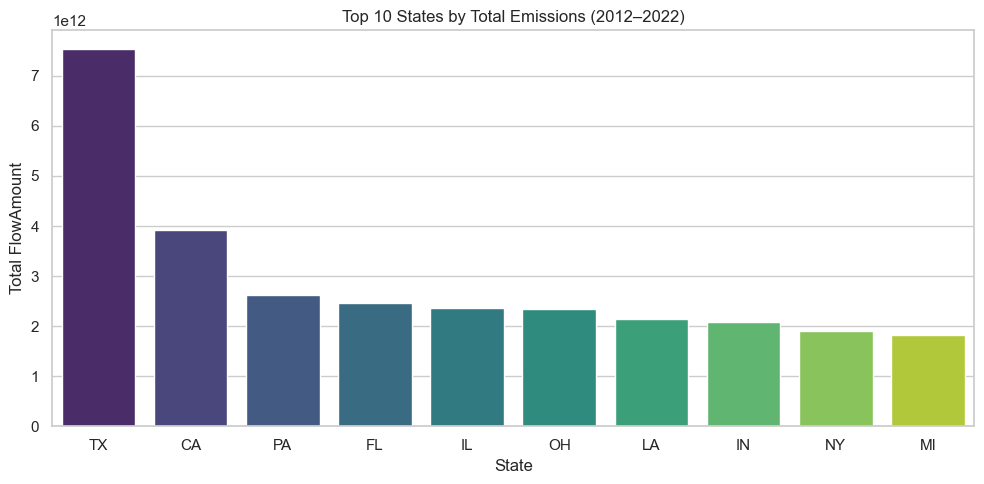

In [13]:
#top 10 states by total emissions
top_states = (df.groupby("State")["FlowAmount"]
    .sum()
    .sort_values(ascending=False)
    .head(10))

#plot total emissions by state
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.title("Top 10 States by Total Emissions (2012–2022)")
plt.xlabel("State")
plt.ylabel("Total FlowAmount")
plt.tight_layout()
plt.show()

In [14]:
#filter to top states
df_top = df[df["State"].isin(top_states.index)]

#compute sector totals and percentages
sector_pct = (df_top.groupby(["State", "Sector"])["FlowAmount"].sum().reset_index())
total_by_state = df_top.groupby("State")["FlowAmount"].sum().rename("TotalFlow")
sector_pct = sector_pct.merge(total_by_state, on="State")
sector_pct["Percentage"] = 100 * sector_pct["FlowAmount"] / sector_pct["TotalFlow"]

#filter sectors > 5% and print
for state, group in sector_pct[sector_pct["Percentage"] > 5].groupby("State"):
    print(f"\n--- {state} ---")
    for _, row in group.sort_values("Percentage", ascending=False).iterrows():
        print(f"{row['Sector']}: {row['Percentage']:.2f}%")


--- CA ---
Personal Consumption Expeditures: 38.04%
Electric Power Generation, Transmission and Distribution: 9.06%
Truck Transportation: 7.48%
Chemical Manufacturing: 6.16%
Justice, Public Order, and Safety Activities: 5.80%
Air Transportation: 5.10%

--- FL ---
Electric Power Generation, Transmission and Distribution: 37.96%
Personal Consumption Expeditures: 25.10%
State and local government electric utilities: 6.68%
Air Transportation: 5.59%

--- IL ---
Personal Consumption Expeditures: 27.80%
Electric Power Generation, Transmission and Distribution: 26.33%
Truck Transportation: 5.91%

--- IN ---
Electric Power Generation, Transmission and Distribution: 37.26%
Personal Consumption Expeditures: 18.41%
Primary Metal Manufacturing: 8.68%
State and local government electric utilities: 6.57%
Chemical Manufacturing: 6.00%

--- LA ---
Chemical Manufacturing: 25.35%
Electric Power Generation, Transmission and Distribution: 15.13%
Petroleum and Coal Products Manufacturing: 11.17%
Personal C

/var/folders/vq/3l9m2qtn5cxc8h_hg04_lx_00000gn/T/ipykernel_71296/3749932047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.values, y=top_sectors.index, palette="magma")


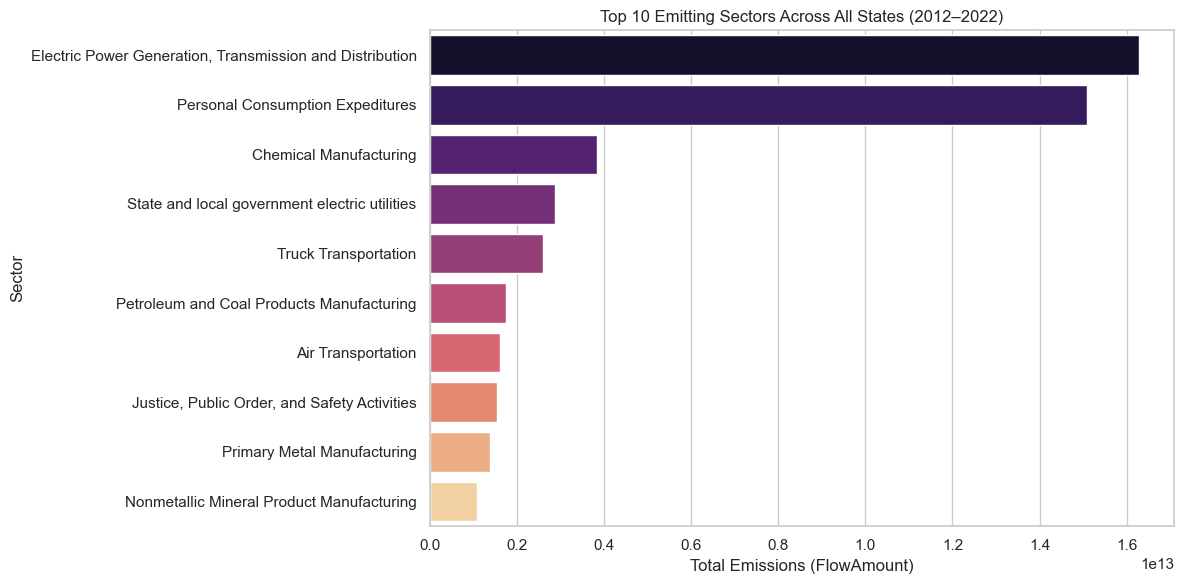

In [15]:
#top 10 sectors by total emissions
top_sectors = (df.groupby("Sector")["FlowAmount"]
    .sum()
    .sort_values(ascending=False)
    .head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette="magma")
plt.title("Top 10 Emitting Sectors Across All States (2012–2022)")
plt.xlabel("Total Emissions (FlowAmount)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()